In [2]:
import pandas as pd
# Créer une série temporelle avec des étiquettes de fréquence et des valeurs
data = pd.Series([120, 181, 71,119,128,190, 73,124, 140,196,84,133,145,206,96,142], index=["t1", "t2", "t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","t13","t14","t15","t16"])

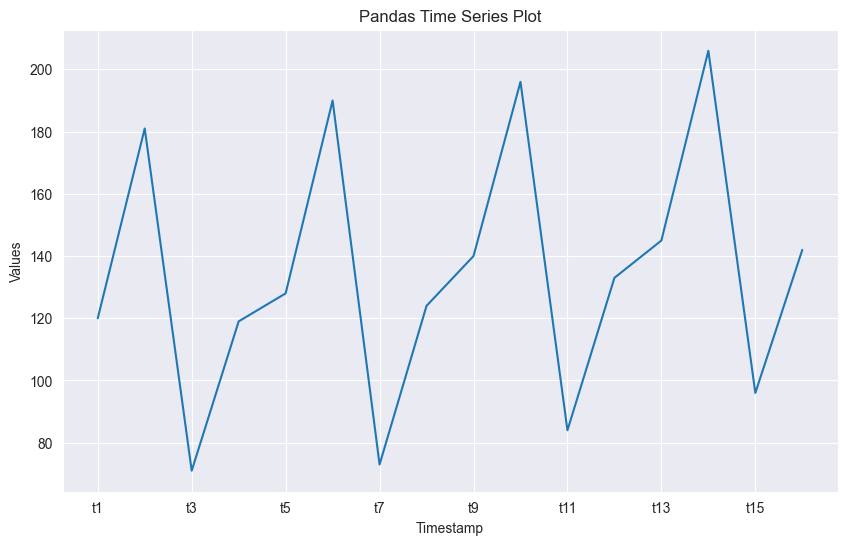

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
data.plot()
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Pandas Time Series Plot')
plt.grid(True)
plt.show()

In [12]:
data2 = [120, 181, 71,119,128,190, 73,124, 140,196,84,133,145,206,96,142]

# Paramètres
alpha_1 = 0.3
alpha_2 = 0.7

# Calculer la valeur initiale (V0) comme la moyenne des 3 premiers points de données
V0 = sum(data[:3]) / 3

# Listes pour stocker les estimations pour chaque alpha
estimations_alpha_1 = [V0]
estimations_alpha_2 = [V0]

# Estimer les valeurs pour chaque point de données
for yt in data[3:]:
    # Estimation en utilisant alpha = 0.3
    Vt_1 = alpha_1 * yt + (1 - alpha_1) * estimations_alpha_1[-1]
    estimations_alpha_1.append(Vt_1)

    # Estimation en utilisant alpha = 0.7
    Vt_2 = alpha_2 * yt + (1 - alpha_2) * estimations_alpha_2[-1]
    estimations_alpha_2.append(Vt_2)


# Print the estimates
print("Estimations using alpha = 0.3:", estimations_alpha_1)
print("Estimations using alpha = 0.7:", estimations_alpha_2)

Estimations using alpha = 0.3: [124.0, 122.5, 124.15, 143.905, 122.6335, 123.04344999999998, 128.13041499999997, 148.4912905, 129.14390335, 130.30073234499997, 134.71051264149997, 156.09735884904995, 138.06815119433497, 139.24770583603447]
Estimations using alpha = 0.7: [124.0, 120.5, 125.75, 170.72500000000002, 102.31750000000001, 117.49525, 133.24857500000002, 177.1745725, 111.95237175000001, 126.685711525, 139.5057134575, 186.05171403725, 123.015514211175, 136.3046542633525]


Erreur totale pour alpha = 0.3 : 316.2690893727506
Erreur totale pour alpha = 0.7 : 176.84419517807245


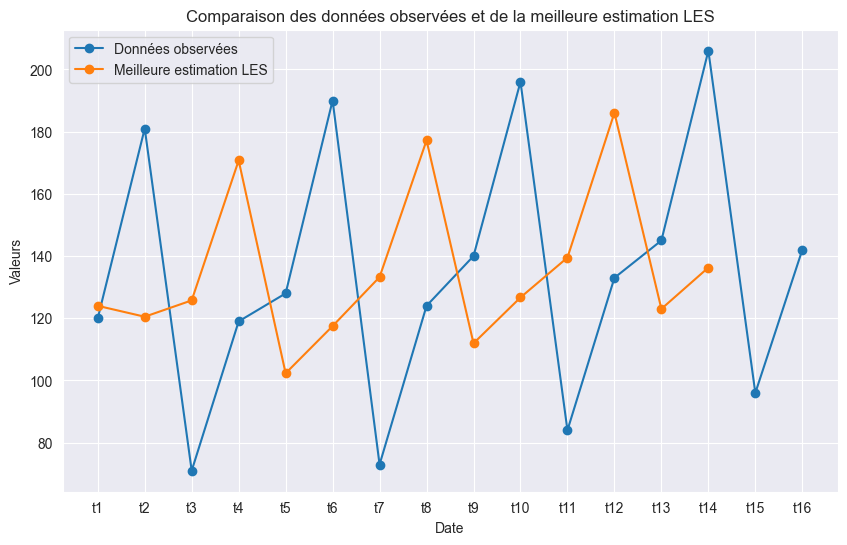

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = [120, 181, 71, 119, 128, 190, 73, 124, 140, 196, 84, 133, 145, 206, 96, 142]

# Parameters
alpha_1 = 0.3
alpha_2 = 0.7

# Calculate the initial value (V0) as the average of the first 3 data points
V0 = sum(data[:3]) / 3

# Lists to store the estimates for each alpha
estimations_alpha_1 = [V0]
estimations_alpha_2 = [V0]

# Estimate values for each data point
for yt in data[3:]:
    # Estimate using alpha = 0.3
    Vt_1 = alpha_1 * yt + (1 - alpha_1) * estimations_alpha_1[-1]
    estimations_alpha_1.append(Vt_1)

    # Estimate using alpha = 0.7
    Vt_2 = alpha_2 * yt + (1 - alpha_2) * estimations_alpha_2[-1]
    estimations_alpha_2.append(Vt_2)
indexxxx=["t1", "t2", "t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","t13","t14"]

indexxxx2=pd.date_range(start='2023-01-04', periods=len(estimations_alpha_2), freq='D')
# Convert the lists of estimations to pandas Series with the same index as the original data
estimations_series_alpha_1 = pd.Series(estimations_alpha_1, index=indexxxx)
estimations_series_alpha_2 = pd.Series(estimations_alpha_2, index=indexxxx)

# Convert the data and estimations to NumPy arrays for calculating the error of forecast
data_np = np.array(data[3:])
estimations_alpha_1_np = np.array(estimations_alpha_1[1:])  # Remove V0 from estimations
estimations_alpha_2_np = np.array(estimations_alpha_2[1:])  # Remove V0 from estimations

# Calculate the error of forecast for each estimation
erreur_alpha_1 = np.abs(data_np - estimations_alpha_1_np)
erreur_alpha_2 = np.abs(data_np - estimations_alpha_2_np)

# Calculate the total error for each alpha
erreur_totale_alpha_1 = np.sum(erreur_alpha_1)
erreur_totale_alpha_2 = np.sum(erreur_alpha_2)

# Print the total errors for each alpha
print("Erreur totale pour alpha = 0.3 :", erreur_totale_alpha_1)
print("Erreur totale pour alpha = 0.7 :", erreur_totale_alpha_2)

# Select the series with the better estimation (lower total error)
meilleure_serie = estimations_series_alpha_1 if erreur_totale_alpha_1 < erreur_totale_alpha_2 else estimations_series_alpha_2
iii = ["t1", "t2", "t3","t4","t5","t6","t7","t8","t9","t10","t11","t12","t13","t14","t15","t16"]
# Plot the original data and the series with the better estimation
plt.figure(figsize=(10, 6))
plt.plot(iii, data, label='Données observées', marker='o')
plt.plot(meilleure_serie.index, meilleure_serie.values, label='Meilleure estimation LES', marker='o')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.title('Comparaison des données observées et de la meilleure estimation LES')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
import pandas as pd

data = [120, 181, 71, 119, 128, 190, 73, 124, 140, 196, 84, 133, 145, 206, 96, 142]
index = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15", "t16"]

# Create the original series
series_temporelle = pd.Series(data, index=index)

# Calculate the exponential smoothing with alpha = 0.3
alpha_03 = 0.3
series_lissage_03 = [series_temporelle[:3].mean()]  # Initialize with the mean of the first 3 values
for i in range(1, len(series_temporelle)):
    smoothed_value = alpha_03 * series_temporelle[i] + (1 - alpha_03) * series_lissage_03[i - 1]
    series_lissage_03.append(smoothed_value)
series_lissage_03 = pd.Series(series_lissage_03, index=index, name="Lissage (α = 0.3)")

# Calculate the exponential smoothing with alpha = 0.7
alpha_07 = 0.7
series_lissage_07 = [series_temporelle[:3].mean()]  # Initialize with the mean of the first 3 values
for i in range(1, len(series_temporelle)):
    smoothed_value = alpha_07 * series_temporelle[i] + (1 - alpha_07) * series_lissage_07[i - 1]
    series_lissage_07.append(smoothed_value)
series_lissage_07 = pd.Series(series_lissage_07, index=index, name="Lissage (α = 0.7)")

# Combine the original series and the smoothed series into a DataFrame
result_df = pd.DataFrame({"Valeur observée": series_temporelle, series_lissage_03.name: series_lissage_03, series_lissage_07.name: series_lissage_07})

print(result_df)


     Valeur observée  Lissage (α = 0.3)  Lissage (α = 0.7)
t1               120         124.000000         124.000000
t2               181         141.100000         163.900000
t3                71         120.070000          98.870000
t4               119         119.749000         112.961000
t5               128         122.224300         123.488300
t6               190         142.557010         170.046490
t7                73         121.689907         102.113947
t8               124         122.382935         117.434184
t9               140         127.668054         133.230255
t10              196         148.167638         177.169077
t11               84         128.917347         111.950723
t12              133         130.142143         126.685217
t13              145         134.599500         139.505565
t14              206         156.019650         186.051670
t15               96         138.013755         123.015501
t16              142         139.209628         136.3046

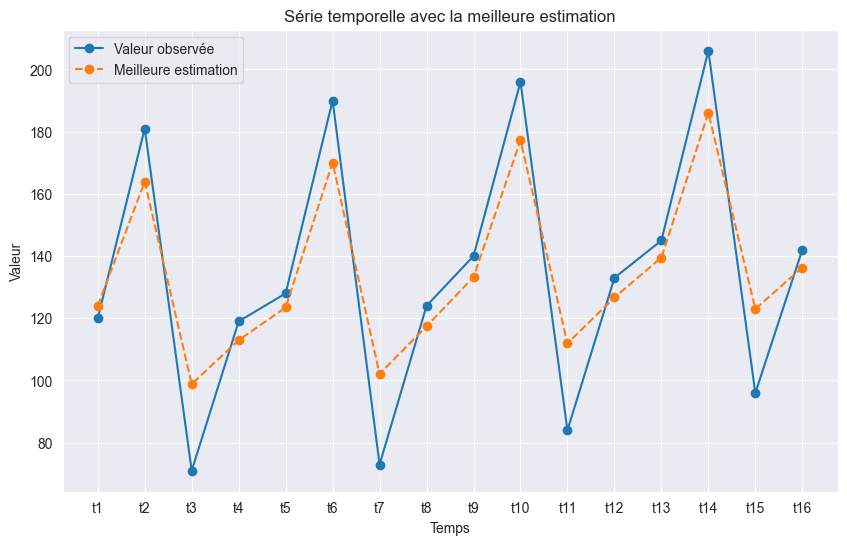

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

data = [120, 181, 71, 119, 128, 190, 73, 124, 140, 196, 84, 133, 145, 206, 96, 142]
index = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15", "t16"]

# Create the original series
series_temporelle = pd.Series(data, index=index)

# Calculate the exponential smoothing with alpha = 0.3
alpha_03 = 0.3
series_lissage_03 = [series_temporelle[:3].mean()]  # Initialize with the mean of the first 3 values
for i in range(1, len(series_temporelle)):
    smoothed_value = alpha_03 * series_temporelle[i] + (1 - alpha_03) * series_lissage_03[i - 1]
    series_lissage_03.append(smoothed_value)
series_lissage_03 = pd.Series(series_lissage_03, index=index, name="Lissage (α = 0.3)")

# Calculate the exponential smoothing with alpha = 0.7
alpha_07 = 0.7
series_lissage_07 = [series_temporelle[:3].mean()]  # Initialize with the mean of the first 3 values
for i in range(1, len(series_temporelle)):
    smoothed_value = alpha_07 * series_temporelle[i] + (1 - alpha_07) * series_lissage_07[i - 1]
    series_lissage_07.append(smoothed_value)
series_lissage_07 = pd.Series(series_lissage_07, index=index, name="Lissage (α = 0.7)")

# Calculate the Mean Squared Error (MSE) for each series
mse_03 = ((series_temporelle - series_lissage_03) ** 2).mean()
mse_07 = ((series_temporelle - series_lissage_07) ** 2).mean()

# Determine the best estimation based on the MSE
best_estimation = series_lissage_03 if mse_03 < mse_07 else series_lissage_07

# Plot the original series and the best estimated series
plt.figure(figsize=(10, 6))
plt.plot(series_temporelle, marker='o', label='Valeur observée')
plt.plot(best_estimation, marker='o', label='Meilleure estimation', linestyle='dashed')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('Série temporelle avec la meilleure estimation')
plt.grid(True)
plt.show()


In [43]:
import pandas as pd

def CoefSaison(series, saisonal_period):
    # Vérifier si la série est valide et a une longueur suffisante
    if not isinstance(series, pd.Series) or len(series) < 2 * saisonal_period:
        raise ValueError("La série doit être une instance de pd.Series avec une longueur suffisante.")

    # Calculer la moyenne mobile centrée sur la période saisonnière
    moving_avg = series.rolling(window=saisonal_period*2, center=True).mean()

    # Calculer les coefficients saisonniers en divisant chaque valeur par la moyenne mobile
    coefficients_saison = series / moving_avg

    return coefficients_saison

# Exemple d'utilisation avec votre série temporelle
data = [120, 181, 71, 119, 128, 190, 73, 124, 140, 196, 84, 133, 145, 206, 96, 142]
index = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15", "t16"]

series_temporelle = pd.Series(data, index=index)
coefficients_saison = CoefSaison(series_temporelle, saisonal_period=4)

print(coefficients_saison)

t1          NaN
t2          NaN
t3          NaN
t4          NaN
t5     1.017893
t6     1.481481
t7     0.560999
t8     0.941176
t9     1.048689
t10    1.445161
t11    0.610354
t12    0.946619
t13    1.015762
t14         NaN
t15         NaN
t16         NaN
dtype: float64


100 :  [0.11134058] -0.17221088785818975
1000 :  [0.23854232] -1.437993986208921


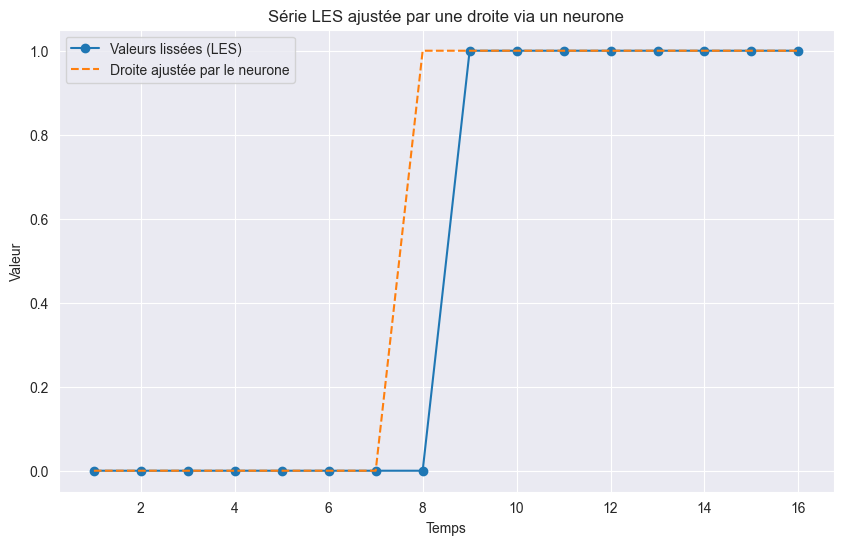

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exemple de série lissée avec alpha = 0.3
data = [120, 142.5, 95.15, 90.305, 97.9135, 119.23945, 103.867615, 94.5873305, 95.30113135, 110.710797945, 100.2975585615, 97.20829099305, 102.645803675135, 113.7510625725945, 103.87574480181615, 100.61202136127131]
index = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10", "t11", "t12", "t13", "t14", "t15", "t16"]

series_les = pd.Series(data, index=index)

# Préparation des données pour le modèle
X = np.arange(1, len(series_les) + 1).reshape(-1, 1)
y = series_les.values.reshape(-1, 1)

# Préparation des données pour le modèle
X = np.arange(1, len(series_les) + 1).reshape(-1, 1)
y = (X > np.mean(X)).astype(int).flatten()  # Étiquettes binaires en fonction de si l'indice de temps est supérieur à la moyenne

from neural import Perceptron
model = Perceptron()
# Création du modèle de neurone
model.fit(X, y)


# Prédictions du modèle
predictions = model.predict(X)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Valeurs lissées (LES)')
plt.plot(X, predictions, label='Droite ajustée par le neurone', linestyle='dashed')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('Série LES ajustée par une droite via un neurone')
plt.grid(True)
plt.show()


In [46]:
# Prévisions pour t=17 et t=18
t_17 = 17
t_18 = 18

X_new = np.array([t_17, t_18]).reshape(-1, 1)
predictions = model.predict(X_new)

# Affichage des prévisions
print(f"Prévision pour t=17 : {'Supérieur' if predictions[0] == 1 else 'Inférieur'} à la moyenne")
print(f"Prévision pour t=18 : {'Supérieur' if predictions[1] == 1 else 'Inférieur'} à la moyenne")

Prévision pour t=17 : Supérieur à la moyenne
Prévision pour t=18 : Supérieur à la moyenne
